Import data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load data
df = pd.read_csv("../data/resumes.csv")

# Preview
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/melvinharsono/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


 1. Check for nulls and class distribution

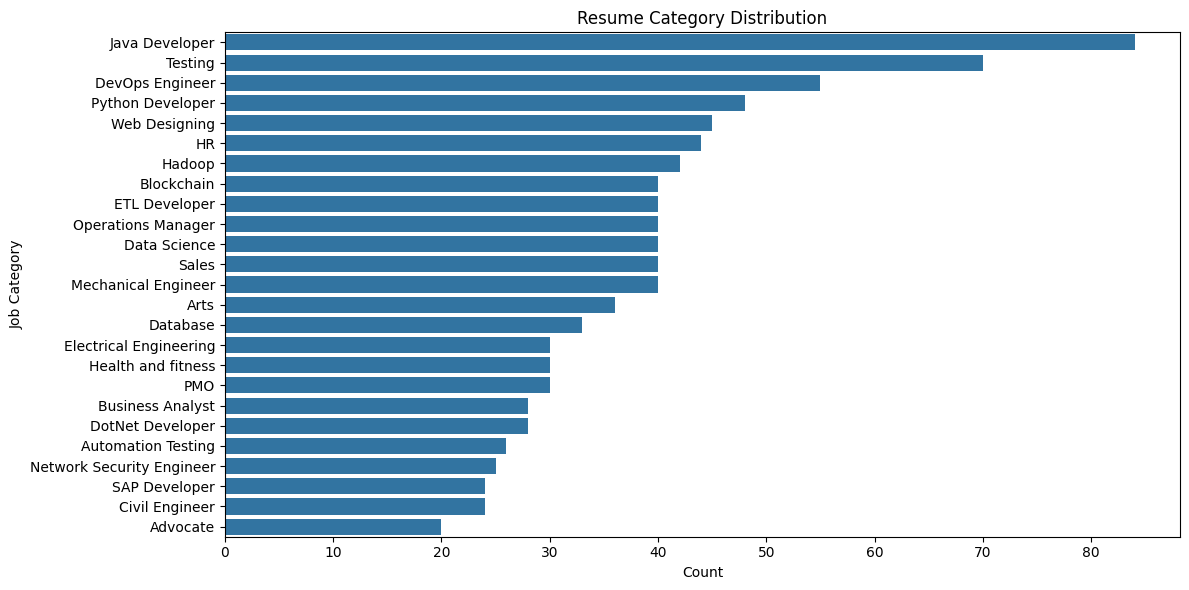

In [3]:
# Check null values
df.isnull().sum()

# Check category distribution
plt.figure(figsize=(12,6))
sns.countplot(data=df, y="Category", order=df["Category"].value_counts().index)
plt.title("Resume Category Distribution")
plt.xlabel("Count")
plt.ylabel("Job Category")
plt.tight_layout()
plt.show()


2. Text Cleaning Function

In [4]:
# Clean and tokenize resume text
def clean_text(text):
    text = re.sub(r'[^a-zA-Z ]', '', text)
    text = text.lower()
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return words

df["cleaned_tokens"] = df["Resume"].apply(clean_text)


3. Top Keywords by Category

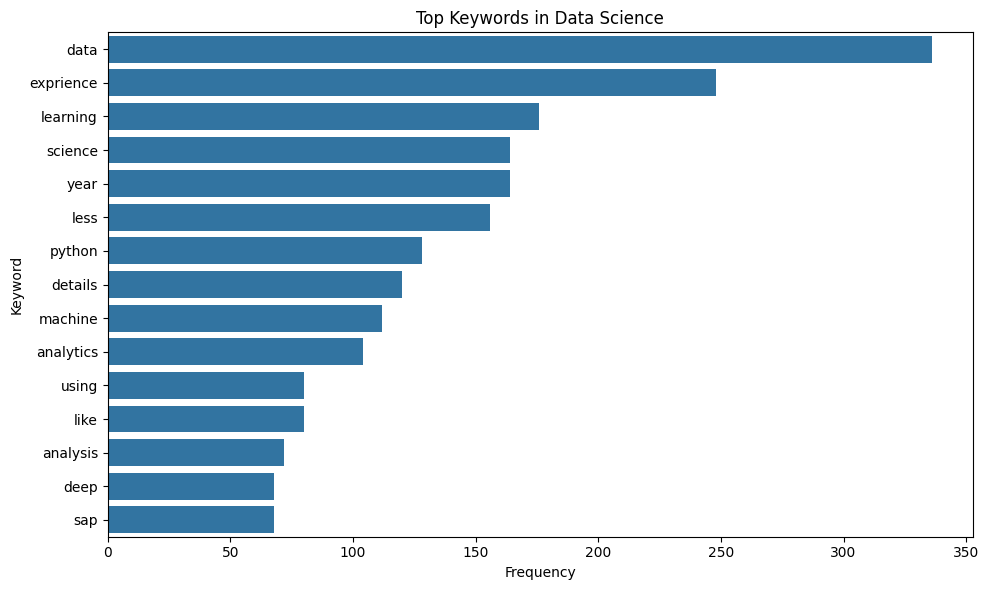

In [5]:
# Join tokens per category
category_keywords = {}

for cat in df["Category"].unique():
    words = df[df["Category"] == cat]["cleaned_tokens"].sum()
    common = Counter(words).most_common(15)
    category_keywords[cat] = common

# Show top keywords per selected category
category = "Data Science"  # <-- Change category here
keywords = dict(category_keywords[category])
plt.figure(figsize=(10,6))
sns.barplot(x=list(keywords.values()), y=list(keywords.keys()))
plt.title(f"Top Keywords in {category}")
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.tight_layout()
plt.show()


4. WordCloud for a Category

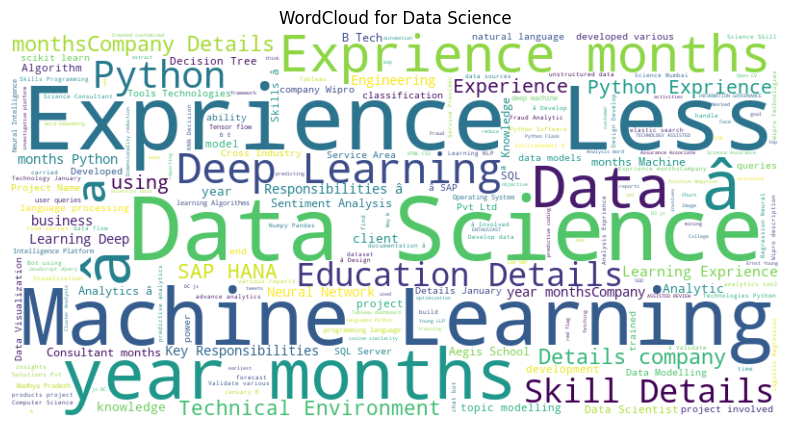

In [6]:
# Wordcloud for one category
text = " ".join(df[df["Category"] == category]["Resume"])
wordcloud = WordCloud(width=800, height=400, stopwords=stop_words, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(f"WordCloud for {category}")
plt.show()


5. Resume Length Analysis

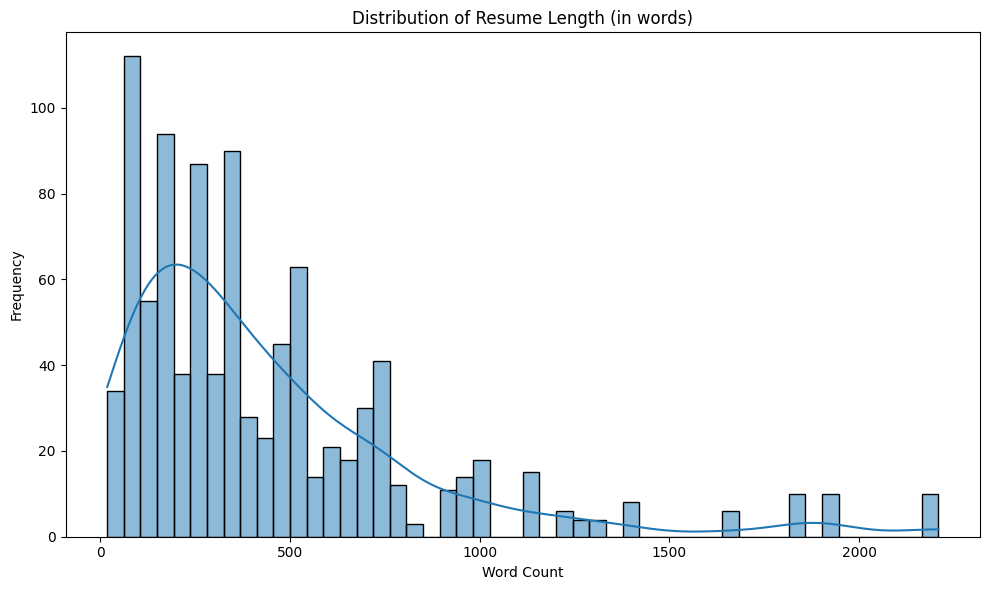

In [7]:
df["length"] = df["Resume"].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,6))
sns.histplot(df["length"], bins=50, kde=True)
plt.title("Distribution of Resume Length (in words)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


 6. Save Cleaned Data (optional)

In [8]:
# Flatten cleaned tokens into string for modeling
df["cleaned_resume"] = df["cleaned_tokens"].apply(lambda x: " ".join(x))

# Save cleaned version
df[["Resume", "cleaned_resume", "Category"]].to_csv("../data/resumes_cleaned.csv", index=False)
